<a href="https://colab.research.google.com/github/atpathak/ML-code-templates_2026/blob/main/Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X_1 = dataset.drop('Salary', axis =1)
y_1 = dataset['Salary']

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(y_train)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

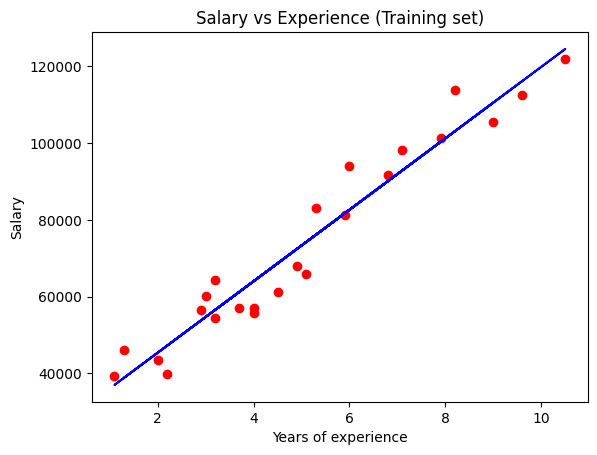

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

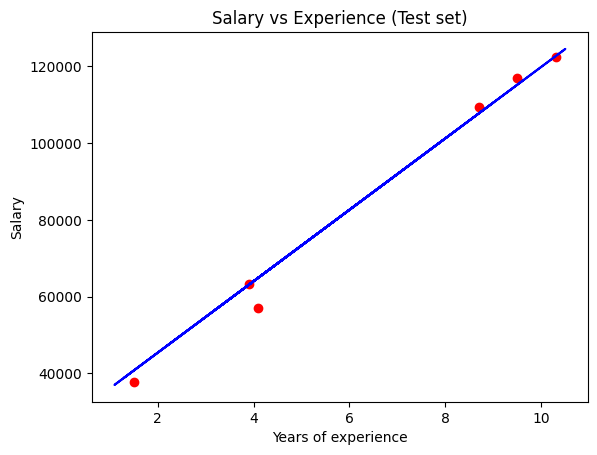

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
print(regressor.predict([[12]]))

[138531.]


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.58]
26780.09915062818


In [ ]:
print(y_pred)

[ 40748.96 122699.62  64961.66  63099.14 115249.56 107799.5 ]


In [ ]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431.]


**Multiple Linear Regression Model**

In [ ]:
df_mul = pd.read_csv("50_Startups.csv")
df_mul.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
missing_data = df_mul.isnull().sum()
print("missing data is : \n", missing_data)

missing data is : 
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [ ]:
X_mul = df_mul.iloc[:, :-1].values
y_mul = df_mul.iloc[:, -1].values

In [ ]:
print(y_mul)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_mul = np.array(ct.fit_transform(X_mul))
print(X_mul)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:
from sklearn.model_selection import train_test_split
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(X_mul, y_mul, test_size = 0.2, random_state=0)

In [ ]:
print(y_mul_train)

[ 96778.92  96479.51 105733.54  96712.8  124266.9  155752.6  132602.65
  64926.08  35673.41 101004.64 129917.04  99937.59  97427.84 126992.93
  71498.49 118474.03  69758.98 152211.77 134307.35 107404.34 156991.12
 125370.37  78239.91  14681.4  191792.06 141585.52  89949.14 108552.04
 156122.51 108733.99  90708.19 111313.02 122776.86 149759.96  81005.76
  49490.75 182901.99 192261.83  42559.73  65200.33]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor_mul = LinearRegression()
regressor_mul.fit(X_mul_train, y_mul_train)

LinearRegression()

In [ ]:
y_mul_pred = regressor_mul.predict(X_mul_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_mul_pred.reshape(len(y_mul_pred), 1), y_mul_test.reshape(len(y_mul_test), 1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [ ]:
print(regressor_mul.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


In [ ]:
print("Slope (Coefficient):", regressor_mul.coef_)
print("Intercept:", regressor_mul.intercept_)

Slope (Coefficient): [ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
Intercept: 42467.52924853278


**Polynomial Linear Regression**

In [ ]:
df_poly = pd.read_csv("Position_Salaries.csv")
df_poly.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X_poly = df_poly.iloc[:, 1:-1].values
y_poly = df_poly.iloc[:, -1].values


In [ ]:
print(X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_poly)


LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly_poly = poly_reg.fit_transform(X_poly)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_poly, y_poly)

LinearRegression()

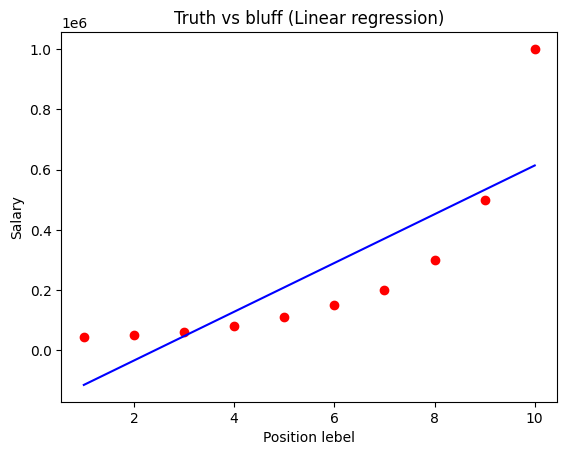

In [ ]:
plt.scatter(X_poly, y_poly, color = 'red')
plt.plot(X_poly, lin_reg.predict(X_poly), color = 'blue')
plt.title('Truth vs bluff (Linear regression)')
plt.xlabel('Position lebel')
plt.ylabel('Salary')
plt.show()

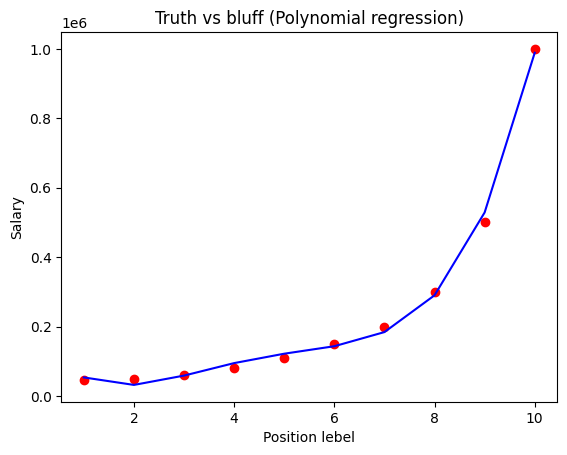

In [ ]:
plt.scatter(X_poly, y_poly, color = 'red')
plt.plot(X_poly, lin_reg_2.predict(X_poly_poly), color = 'blue')
plt.title('Truth vs bluff (Polynomial regression)')
plt.xlabel('Position lebel')
plt.ylabel('Salary')
plt.show()

/tmp/ipython-input-2978222523.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_poly), max(X_poly), 0.1)


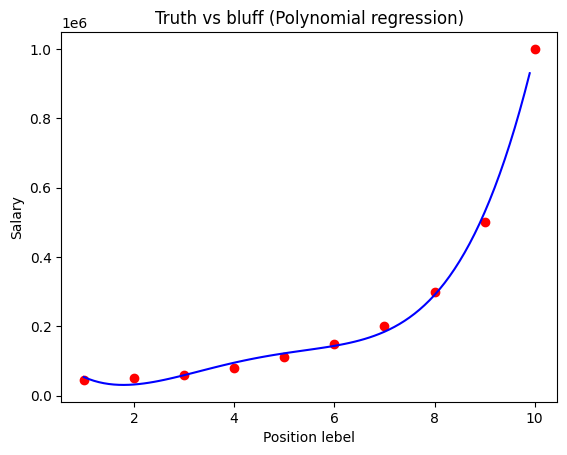

In [ ]:
X_grid = np.arange(min(X_poly), max(X_poly), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_poly, y_poly, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth vs bluff (Polynomial regression)')
plt.xlabel('Position lebel')
plt.ylabel('Salary')
plt.show()

In [ ]:
lin_reg.predict([[6.5]])

array([330378.79])

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

**Support Vector Regression (SVR)**

In [ ]:
X_svr = df_poly.iloc[:, 1:-1].values
y_svr = df_poly.iloc[:, -1].values

In [ ]:
print(X_svr)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
y_svr = y_svr.reshape(len(y_svr), 1)
print(y_svr)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_svr = sc_X.fit_transform(X_svr)
y_svr = sc_y.fit_transform(y_svr)

In [ ]:
print(X_svr)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [ ]:
print(y_svr)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


In [ ]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_svr, y_svr)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
sc_y.inverse_transform(regressor_svr.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.02]])

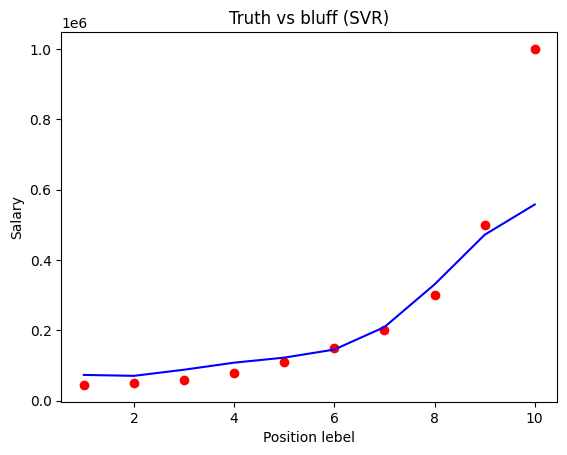

In [ ]:
plt.scatter(sc_X.inverse_transform(X_svr), sc_y.inverse_transform(y_svr), color = 'red')
plt.plot(sc_X.inverse_transform(X_svr), sc_y.inverse_transform(regressor_svr.predict(X_svr).reshape(-1,1)), color = 'blue')
plt.title('Truth vs bluff (SVR)')
plt.xlabel('Position lebel')
plt.ylabel('Salary')
plt.show()

/tmp/ipython-input-3239180826.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid_1 = np.arange(min(sc_X.inverse_transform(X_svr)), max(sc_X.inverse_transform(X_svr)), 0.1)


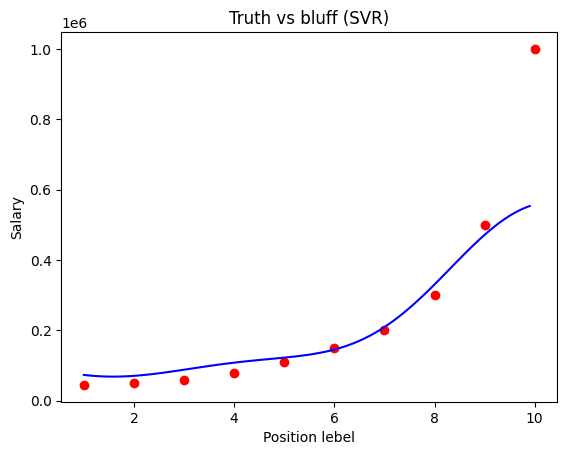

In [ ]:
X_grid_1 = np.arange(min(sc_X.inverse_transform(X_svr)), max(sc_X.inverse_transform(X_svr)), 0.1)
X_grid_1 = X_grid.reshape((len(X_grid_1), 1))

plt.scatter(sc_X.inverse_transform(X_svr), sc_y.inverse_transform(y_svr), color = 'red')
plt.plot(X_grid_1, sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_grid_1)).reshape(-1,1)), color = 'blue')
plt.title('Truth vs bluff (SVR)')
plt.xlabel('Position lebel')
plt.ylabel('Salary')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data = load_diabetes()
X = data.data
y = data.target

In [ ]:
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [ ]:
X = X[:, 2].reshape(len(X), 1)

In [ ]:
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [ ]:
y = y.reshape(len(y),1)
print(y)

[[151.]
 [ 75.]
 [141.]
 [206.]
 [135.]
 [ 97.]
 [138.]
 [ 63.]
 [110.]
 [310.]
 [101.]
 [ 69.]
 [179.]
 [185.]
 [118.]
 [171.]
 [166.]
 [144.]
 [ 97.]
 [168.]
 [ 68.]
 [ 49.]
 [ 68.]
 [245.]
 [184.]
 [202.]
 [137.]
 [ 85.]
 [131.]
 [283.]
 [129.]
 [ 59.]
 [341.]
 [ 87.]
 [ 65.]
 [102.]
 [265.]
 [276.]
 [252.]
 [ 90.]
 [100.]
 [ 55.]
 [ 61.]
 [ 92.]
 [259.]
 [ 53.]
 [190.]
 [142.]
 [ 75.]
 [142.]
 [155.]
 [225.]
 [ 59.]
 [104.]
 [182.]
 [128.]
 [ 52.]
 [ 37.]
 [170.]
 [170.]
 [ 61.]
 [144.]
 [ 52.]
 [128.]
 [ 71.]
 [163.]
 [150.]
 [ 97.]
 [160.]
 [178.]
 [ 48.]
 [270.]
 [202.]
 [111.]
 [ 85.]
 [ 42.]
 [170.]
 [200.]
 [252.]
 [113.]
 [143.]
 [ 51.]
 [ 52.]
 [210.]
 [ 65.]
 [141.]
 [ 55.]
 [134.]
 [ 42.]
 [111.]
 [ 98.]
 [164.]
 [ 48.]
 [ 96.]
 [ 90.]
 [162.]
 [150.]
 [279.]
 [ 92.]
 [ 83.]
 [128.]
 [102.]
 [302.]
 [198.]
 [ 95.]
 [ 53.]
 [134.]
 [144.]
 [232.]
 [ 81.]
 [104.]
 [ 59.]
 [246.]
 [297.]
 [258.]
 [229.]
 [275.]
 [281.]
 [179.]
 [200.]
 [200.]
 [173.]
 [180.]
 [ 84.]
 [121.]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_test)

[[219.]
 [ 70.]
 [202.]
 [230.]
 [111.]
 [ 84.]
 [242.]
 [272.]
 [ 94.]
 [ 96.]
 [ 94.]
 [252.]
 [ 99.]
 [297.]
 [135.]
 [ 67.]
 [295.]
 [264.]
 [170.]
 [275.]
 [310.]
 [ 64.]
 [128.]
 [232.]
 [129.]
 [118.]
 [263.]
 [ 77.]
 [ 48.]
 [107.]
 [140.]
 [113.]
 [ 90.]
 [164.]
 [180.]
 [233.]
 [ 42.]
 [ 84.]
 [172.]
 [ 63.]
 [ 48.]
 [108.]
 [156.]
 [168.]
 [ 90.]
 [ 52.]
 [200.]
 [ 87.]
 [ 90.]
 [258.]
 [136.]
 [158.]
 [ 69.]
 [ 72.]
 [171.]
 [ 95.]
 [ 72.]
 [151.]
 [168.]
 [ 60.]
 [122.]
 [ 52.]
 [187.]
 [102.]
 [214.]
 [248.]
 [181.]
 [110.]
 [140.]
 [202.]
 [101.]
 [222.]
 [281.]
 [ 61.]
 [ 89.]
 [ 91.]
 [186.]
 [220.]
 [237.]
 [233.]
 [ 68.]
 [190.]
 [ 96.]
 [ 72.]
 [153.]
 [ 98.]
 [ 37.]
 [ 63.]
 [184.]]


In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [ ]:
print(X_test)

[[-0.16822504]
 [ 0.74501508]
 [-0.12256303]
 [ 1.06464912]
 [-0.46502808]
 [-0.55635209]
 [ 3.57605945]
 [ 0.9276631 ]
 [-1.94904327]
 [ 0.28839502]
 [-0.73900011]
 [-1.26411318]
 [-1.33260619]
 [ 0.26556402]
 [-1.21845117]
 [ 0.08291599]
 [ 1.47560717]
 [ 1.84090322]
 [ 0.56236706]
 [ 1.20163514]
 [ 0.79067709]
 [-0.94447914]
 [-1.08146516]
 [ 0.44821204]
 [ 0.9048321 ]
 [ 0.26556402]
 [ 1.22446614]
 [-0.41936607]
 [-1.60657822]
 [-0.48785908]
 [ 1.93222723]
 [-0.83032412]
 [ 0.26556402]
 [-0.16822504]
 [ 0.81350809]
 [ 1.61259319]
 [-0.69333811]
 [-0.73900011]
 [-0.69333811]
 [-1.26411318]
 [-1.51525421]
 [-0.6705071 ]
 [-0.51069008]
 [-0.73900011]
 [-0.99014114]
 [-0.78466212]
 [-0.80749312]
 [-1.10429616]
 [-1.83488825]
 [-0.00840802]
 [ 1.20163514]
 [-1.51525421]
 [ 0.33405703]
 [-0.89881713]
 [-0.41936607]
 [ 1.33862116]
 [-1.01297215]
 [ 1.27012815]
 [-0.41936607]
 [-1.19562017]
 [ 0.60802906]
 [ 0.83633909]
 [ 1.11031113]
 [-0.99014114]
 [-1.4239302 ]
 [ 0.35688803]
 [-0.28238

In [ ]:
svr_linear = SVR(kernel='linear', C=100, epsilon=0.1)
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
sorted_idx = np.argsort(X_test[:, 0])
sorted_idx

array([ 8, 48, 28, 40, 51, 87, 64, 84, 82, 86, 74, 12, 83, 39, 11, 14, 59,
       47, 22, 56, 63, 44, 21, 53, 75, 31, 46, 45, 68, 10, 37, 43, 38, 36,
       41, 85,  5, 67, 42, 72, 29,  4, 79, 70, 54, 58, 27, 69, 66, 81, 73,
       33,  0, 80,  2, 49, 15, 13, 32, 25,  9, 52, 65, 78, 23, 18, 60, 71,
       88,  1, 20, 77, 34, 61, 24,  7,  3, 62, 19, 50, 26, 76, 57, 55, 16,
       35, 17, 30,  6])

In [ ]:
X_test_sorted = X_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]

y_pred_linear_sorted = y_pred_linear[sorted_idx]
y_pred_rbf_sorted = y_pred_rbf[sorted_idx]

In [ ]:
print(y_test_sorted)

[[-0.76633204]
 [-0.81764616]
 [-1.35644442]
 [-1.35644442]
 [ 0.05469387]
 [-1.16401647]
 [ 0.77309155]
 [-0.00944878]
 [-0.74067498]
 [-1.49755825]
 [-0.83047469]
 [-0.70218939]
 [-1.0485597 ]
 [-1.16401647]
 [ 1.26057569]
 [-0.24036232]
 [-1.20250206]
 [-0.85613175]
 [-0.33016203]
 [-1.0485597 ]
 [-0.6637038 ]
 [-0.81764616]
 [-1.15118794]
 [-1.0485597 ]
 [-0.80481763]
 [-0.52258997]
 [ 0.59349213]
 [-1.3051303 ]
 [-0.17621967]
 [-0.76633204]
 [-0.89461734]
 [ 0.18297917]
 [ 0.23429329]
 [-1.4334156 ]
 [-0.58673262]
 [-0.71501792]
 [-0.89461734]
 [-0.56107556]
 [ 0.02903681]
 [ 1.63260306]
 [-0.59956115]
 [-0.54824703]
 [ 1.01683362]
 [-0.67653233]
 [ 0.22146476]
 [ 0.18297917]
 [-0.98441705]
 [ 0.61914919]
 [ 0.34975006]
 [ 0.46520683]
 [-1.18967353]
 [ 0.13166505]
 [ 0.8372342 ]
 [-1.09987382]
 [ 0.61914919]
 [ 1.33754687]
 [-1.11270235]
 [ 1.83785954]
 [-0.81764616]
 [-0.45844732]
 [-0.74067498]
 [-1.08704529]
 [ 1.20926157]
 [ 1.06814774]
 [ 1.00400509]
 [ 0.20863623]
 [-0.40713

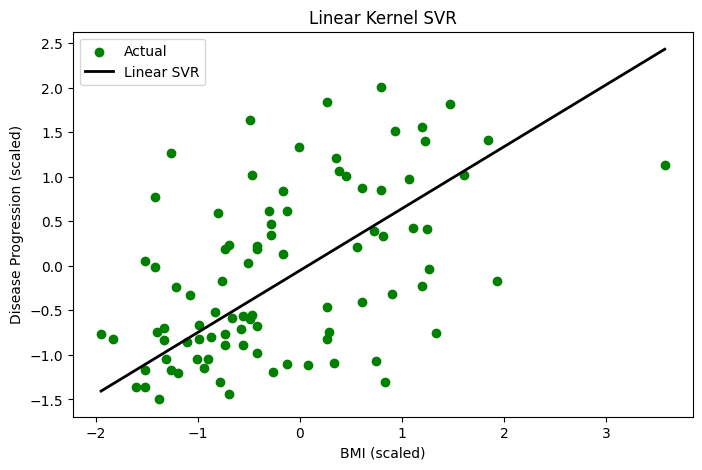

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_sorted, y_test_sorted, color='green', label='Actual')
plt.plot(X_test_sorted, y_pred_linear_sorted,
         color='black', linewidth=2, label='Linear SVR')

plt.title("Linear Kernel SVR")
plt.xlabel("BMI (scaled)")
plt.ylabel("Disease Progression (scaled)")
plt.legend()
plt.show()

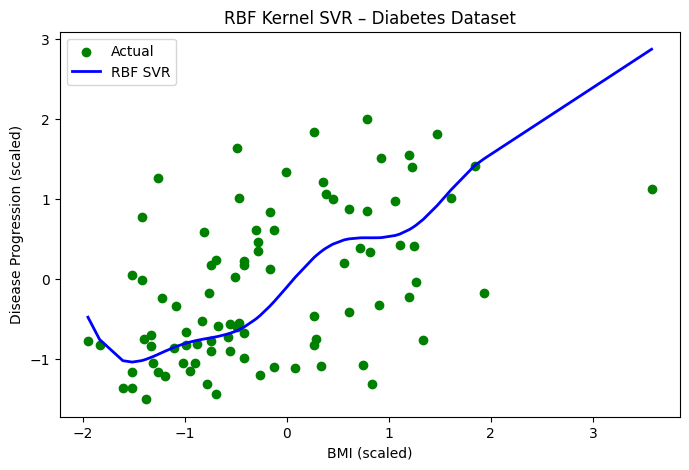

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_sorted, y_test_sorted, color='green', label='Actual')
plt.plot(X_test_sorted, y_pred_rbf_sorted,
         color='blue', linewidth=2, label='RBF SVR')

plt.title("RBF Kernel SVR – Diabetes Dataset")
plt.xlabel("BMI (scaled)")
plt.ylabel("Disease Progression (scaled)")
plt.legend()
plt.show()

In [ ]:
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear SVR RMSE:", rmse_linear)
print("Linear SVR MAE:", mae_linear)

Linear SVR RMSE: 0.8423305650413904
Linear SVR MAE: 0.6735880994376383


In [ ]:
rmse_rbf = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)

print("RBF SVR RMSE:", rmse_rbf)
print("RBF SVR MAE:", mae_rbf)

RBF SVR RMSE: 0.8753416035431131
RBF SVR MAE: 0.6797975426553673
